In [2]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

In [3]:
L = 0.1
du = 0.0015
E = 82e9
rho = 9700

tau = 0.005
h = 0.005
T = 1
c = 0.1

In [4]:
xs, ts = np.arange(0, L + h, h), np.arange(0, T + tau, tau)
nx, nt = len(xs), len(ts)

In [5]:
u = np.zeros((nt, nx))

xs_center = xs[1:-1]
gamma = tau / h * c

#### Инициализируем первый слой

In [6]:
for i, x in enumerate(xs):
    coeff = x / L if x <= L / 2 else (1 - x / L)
    u[0][i] = 2 * du * coeff

#### Инициализируем второй слой

In [7]:
for i, x in enumerate(xs_center, 1):    
    u[1][i] = u[0][i] + gamma**2 / 2 * (u[0][i + 1] - 2 * u[0][i] + u[0][i - 1]) 

In [8]:
for n, t in enumerate(ts[2:], 2):
    for i, x in enumerate(xs_center, 1):
        u[n][i] = 2 * u[n - 1][i] - u[n - 2][i] + gamma**2 * (u[n - 1][i + 1] - 2 * u[n - 1][i] + u[n - 1][i - 1])

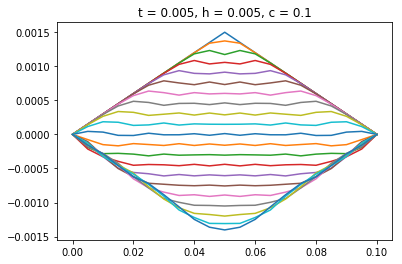

In [9]:


for n in range(0, nt, 10):
    plt.title('t = {}, h = {}, c = {}'.format(tau, h, gamma))
    plt.plot(xs, u[n])

plt.show()

<IPython.core.display.Javascript object>


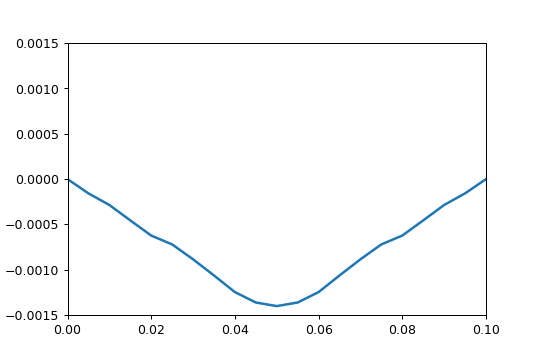

In [12]:
%matplotlib notebook
%matplotlib notebook
from matplotlib import animation

fig = plt.figure() 
ax = plt.axes(xlim=(0, L), ylim=(-du, du)) 
line, = ax.plot([], [], lw=2) 

# initialization function: plot the background of each frame 
def init(): 
    line.set_data([], []) 
    return line, 

# animation function. This is called sequentially 
def animate(i): 
    line.set_data(xs, u[i]) 
    return line, 

# call the animator. blit=True means only re-draw the parts that have changed. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=600, interval=30, blit=True) 

plt.show()

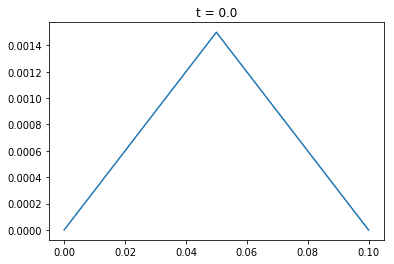

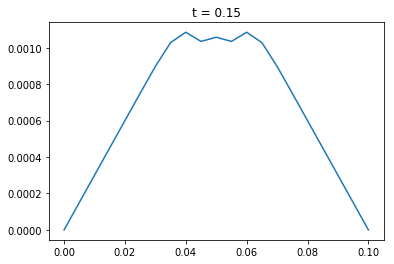

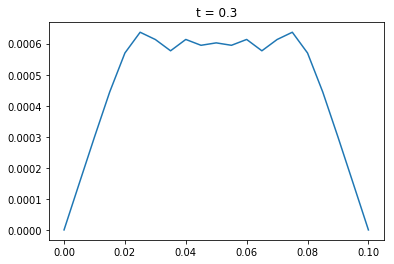

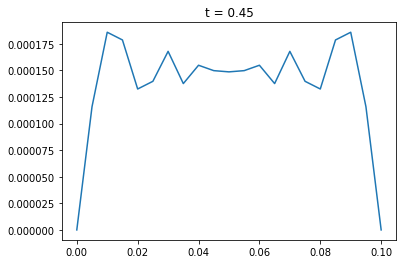

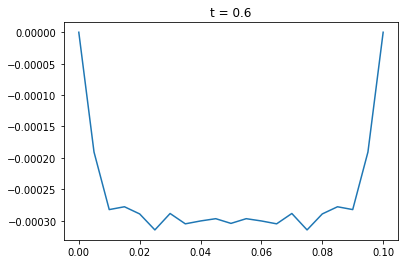

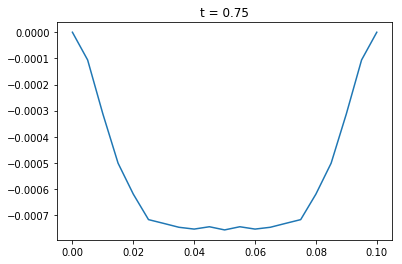

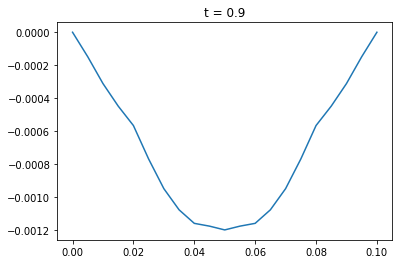

In [11]:
%matplotlib inline
for n in range(0, nt, 30):
    plt.plot(xs, u[n])
    plt.title('t = {}'.format(ts[n]))
    plt.show()